In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
image_generator = ImageDataGenerator(
    rescale=1./255.,
    shear_range=0.1,
    zoom_range=0.3,
)
image_generator_test = ImageDataGenerator(
    rescale=1./255.
)

In [3]:
train_data = image_generator.flow_from_directory(
    'data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=10
)

Found 550 images belonging to 2 classes.


In [4]:
test_data = image_generator_test.flow_from_directory(
    'test_data',
    target_size=(500, 500),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=10
)

Found 74 images belonging to 2 classes.


In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

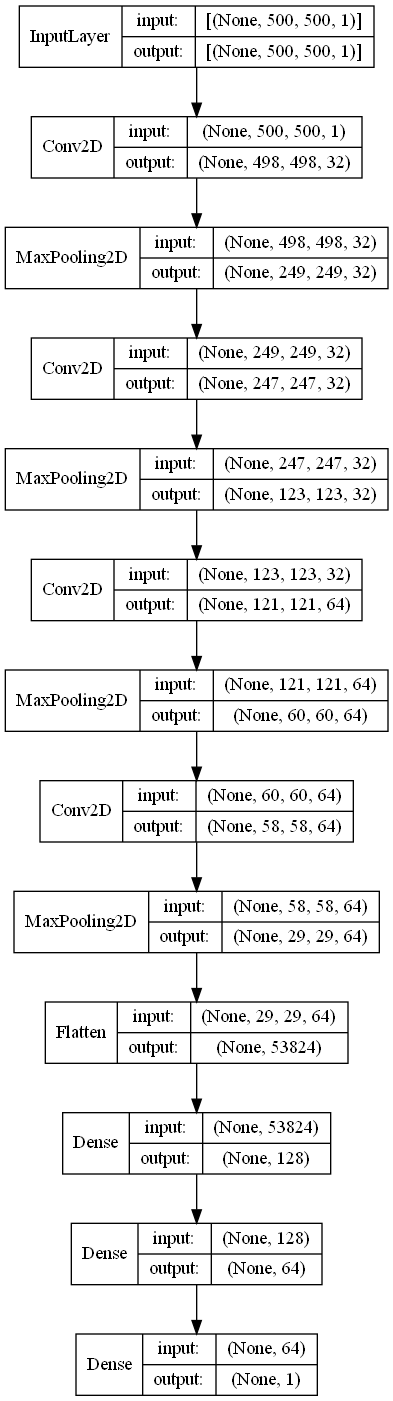

In [7]:
plot_model(model, show_shapes=True, show_layer_names=False)

In [8]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes), y=train_data.classes)

array([1.39593909, 0.77903683])

In [10]:
weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_data.classes), y=train_data.classes)

In [11]:
class_weights = dict(zip(np.unique(train_data.classes), weights))

In [12]:
class_weights

{0: 1.3959390862944163, 1: 0.7790368271954674}

In [13]:
es = EarlyStopping(monitor='val_loss', mode='min', patience=3)
rlrop = ReduceLROnPlateau(monitor='val_loss', patience=2, factor=0.2, min_lr=0.001)

In [14]:
mch = ModelCheckpoint('chestxray.h5', monitor='val_loss', mode='min', save_best_only=True)

In [15]:
history = model.fit(train_data, steps_per_epoch=len(train_data), epochs=30, validation_data=test_data, validation_steps=len(test_data), callbacks=[es, rlrop, mch], class_weight=class_weights)

Epoch 1/30
55/55 [==============================] - 34s 598ms/step - loss: 0.7106 - accuracy: 0.5618 - val_loss: 0.6823 - val_accuracy: 0.6486 - lr: 0.0010
Epoch 2/30
55/55 [==============================] - 32s 580ms/step - loss: 0.6443 - accuracy: 0.6127 - val_loss: 0.6520 - val_accuracy: 0.5946 - lr: 0.0010
Epoch 3/30
55/55 [==============================] - 33s 602ms/step - loss: 0.6067 - accuracy: 0.6436 - val_loss: 0.4724 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 4/30
55/55 [==============================] - 34s 616ms/step - loss: 0.5959 - accuracy: 0.6509 - val_loss: 0.4953 - val_accuracy: 0.6622 - lr: 0.0010
Epoch 5/30
55/55 [==============================] - 34s 605ms/step - loss: 0.4886 - accuracy: 0.7891 - val_loss: 0.3024 - val_accuracy: 0.8919 - lr: 0.0010
Epoch 6/30
55/55 [==============================] - 34s 621ms/step - loss: 0.3507 - accuracy: 0.8727 - val_loss: 0.3276 - val_accuracy: 0.8919 - lr: 0.0010
Epoch 7/30
55/55 [==============================] - 35s 625ms/st

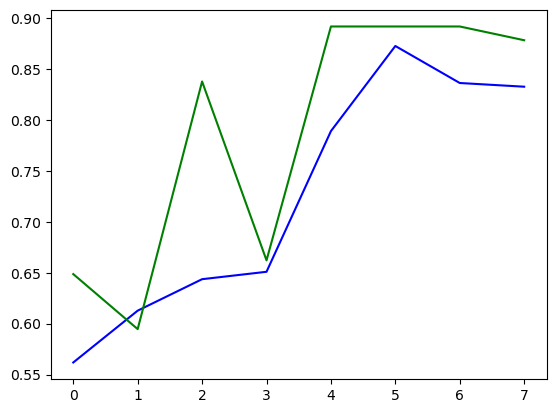

In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')

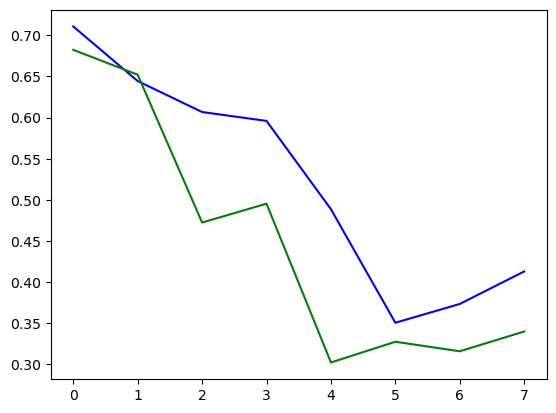

In [17]:
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='green')

In [1]:
# --------------------------------- Restart Kernel

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

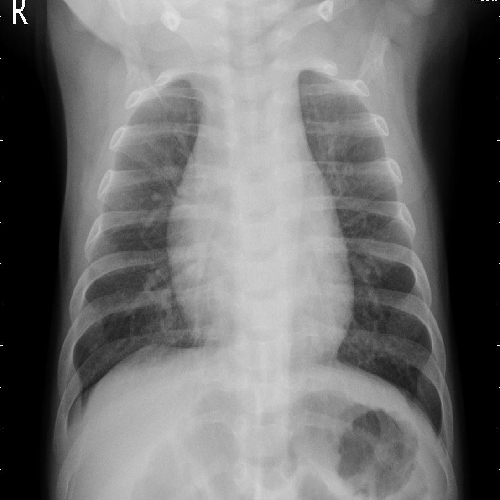

In [3]:
img = load_img('test_data/opacity/person1653_virus_2859.jpeg', target_size=(500, 500), color_mode='grayscale')
img

In [4]:
img = img_to_array(img)
img

array([[[16.],
        [17.],
        [18.],
        ...,
        [ 0.],
        [ 6.],
        [ 5.]],

       [[16.],
        [16.],
        [17.],
        ...,
        [21.],
        [ 3.],
        [ 0.]],

       [[15.],
        [16.],
        [17.],
        ...,
        [ 4.],
        [21.],
        [ 0.]],

       ...,

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]]], dtype=float32)

In [5]:
model = load_model('chestxray.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 498, 498, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 249, 249, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 247, 247, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 60, 60, 64)       0

In [6]:
import tensorflow as tf
model.predict(tf.expand_dims(img, axis=0))

1/1 [==============================] - 0s 160ms/step


array([[1.]], dtype=float32)

In [7]:
preds = model.predict(tf.expand_dims(img, axis=0))
if float(preds[0][0]) > 0.5:
    print('Virus')
else:
    print('Normal')

1/1 [==============================] - 0s 48ms/step
Virus


In [ ]:
# MasoudKaviani.ir